## Import Library

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

## load dataset

In [2]:
data = pd.read_csv(r'credit-card.csv')

In [3]:
data.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1    Time  \
0           0             0               0               541   406.0   
1           1             1               1               623   472.0   
2           2             2               2              4920  4462.0   
3           3             3               3              6108  6986.0   
4           4             4               4              6329  7519.0   

         V1        V2        V3        V4        V5  ...       V21       V22  \
0 -2.312227  1.951992 -1.609851  3.997906 -0.522188  ...  0.517232 -0.035049   
1 -3.043541 -3.157307  1.088463  2.288644  1.359805  ...  0.661696  0.435477   
2 -2.303350  1.759247 -0.359745  2.330243 -0.821628  ... -0.294166 -0.932391   
3 -4.397974  1.358367 -2.592844  2.679787 -1.128131  ...  0.573574  0.176968   
4  1.234235  3.019740 -4.304597  4.732795  3.624201  ... -0.379068 -0.704181   

        V23       V24       V25       V26       V27       V28  Amount  Class  
0 -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
1  1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
2  0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
3 -0.436207 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
4 -0.656805 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 35 columns]

In [4]:
data.shape
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [5]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [6]:
# take only 9000 0's sameple
data_0 = data_0.sample(n=9000)

In [7]:
data = data_1.append(data_0)

data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [8]:
# save as csv
data.to_csv('credit-card.csv')

In [9]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


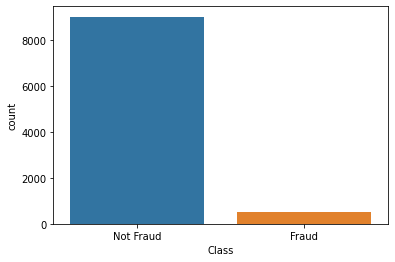

In [10]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [11]:
# check for null values
data.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
Unnamed: 0.1.1      0
Unnamed: 0.1.1.1    0
Time                0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Amount              0
Class               0
dtype: int64

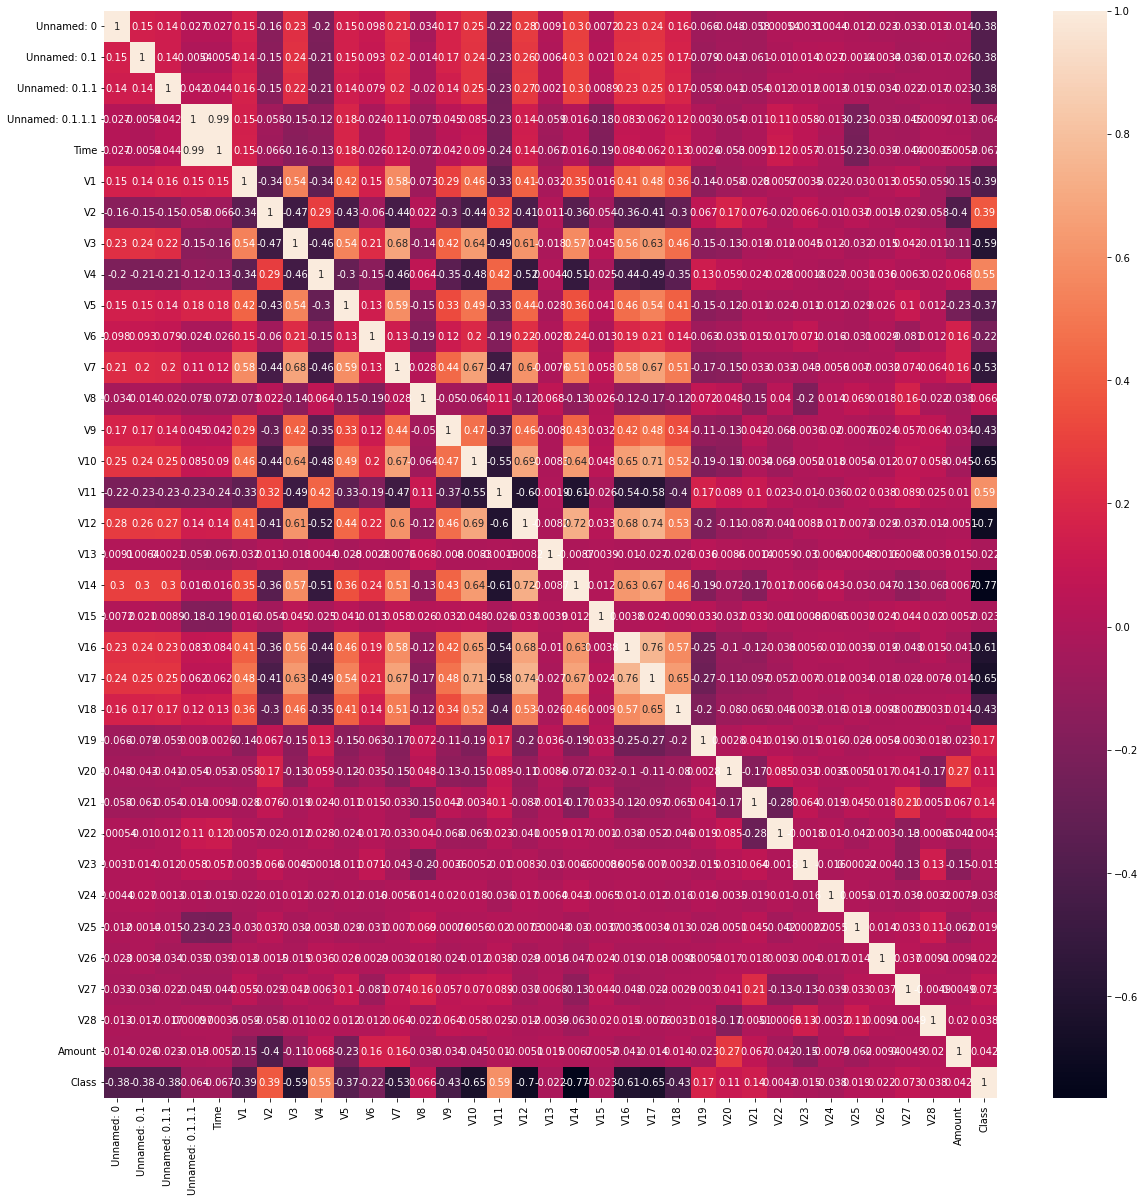

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Respose and Target variable

In [13]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 9000)

## Train test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model uing Logitic Regression

In [15]:
# create the object
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
accuracy_score(y_predict, y)

1.0

In [17]:
np.unique(y_predict)

array([0, 1], dtype=int64)

## The matrix trap

In [18]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is: 1.0
Roc auc scote: 1.0
F1 core: 1.0


In [19]:
confusion_matrix(xgb_y_predict, y_test)

array([[1800,    0],
       [   0,   99]], dtype=int64)

##  Resampling Technique

In [20]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [21]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 35)

class 1: (492, 35)


## 1. Random under sampling

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


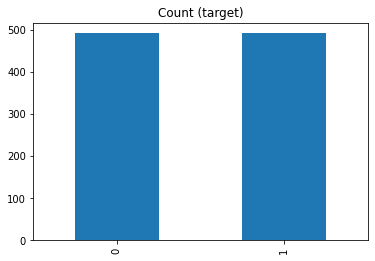

In [22]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


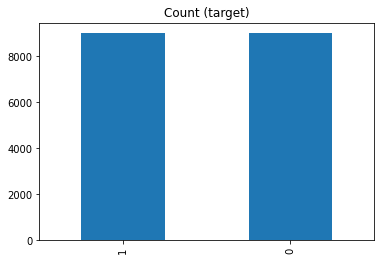

In [23]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [24]:
# import library
import imblearn

## 3. Random under-sampling with imblearn

In [25]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## 4.Random over-sampling with imblearn

In [26]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## 5. under-sampling Tomek links

In [27]:
# load library
from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 8996, 1: 492})


## 6. Synthetic minority over-sampleing technique

In [28]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 9000, 1: 492})
Resampple dataset shape: Counter({1: 9000, 0: 9000})


## 7. NearMiss

In [29]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


## 8. Change the performance metric

In [30]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

[09:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


## 9. penalize algorithm (cost-sensitive training)

In [31]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)

In [32]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.9813888888888889
Accuracy score: 0.9647182727751448
F1 score: 0.7471698113207548


## 10. Tree based algorithm

In [33]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)

In [38]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0
